<h3>Business Problem</h3>
<p>We build a model to <b>predict how likely a customer will churn in telecommunication company</b> by analyzing its characteristics:
    <li>1. Demographic Information</li>
    <li>2. Account Information</li>
    <li>3. Services Information</li></p>
<h4>The Objective</h4>
<p>To obtain a <b>data-drive solution</b> that will allow us to <b>reduce churn rates</b> and as a consequence, to <b>increase customer satisfaction and corportation revenue</b>.</p>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mutual_info_score

<h3>Data Reading</h3>
<p>The first step of the analysis consists of <b>reading and storing the data</b> in a Pandas data frame using the pandas.read_csv function.</p>

In [2]:
# import telecom dataset into a pandas data frame
df_telco = pd.read_csv('telco_churn.csv')

# visualize column names
df_telco.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [3]:
# check for unique values of each column
for column in df_telco.columns:
    print('Column: {} - Unique Values: {}'.format(column, df_telco[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

<p>As shown above, the telco data set contains <b>19 independent variables</b>, which can be classified into 3 groups:</p>

<b>Demographic Information</b>
<li>gender : Whether the client is a female or a male(Female, Male).</li>
<li>SeniorCitizen : Whether the client is a senior citizen or not.(0, 1).</li>
<li>Partner : Whether the client has a partner or not(Yes, No)</li>
<li>Dependents : Whether the client has dependents or not(Yes, No).</li>

<b>Customer Account Information</b>
<li>tenure : Number of months the customer has stayed with the company.</li>
<li>Contract : Indicates the customer's current contract type(Month-to-Month, One year, Two year).</li>
<li>PaperlessBilling : Whether the client has paperless billing or not(Yes, No).</li>
<li>PaymentMethod : The customer's payment method (Electronic Check, Mailed Check, Bank Transfer, Credit Card).</li>
<li>MonthlyCharges : The amount charged to the customer monthly.</li>
<li>TotalCharges : The total amount charged to the customer.</li>

<b>Services Information</b>
<li>PhoneService : Whether the client has a phone service or not(Yes, No).</li>
<li>MultipleLines : Whether the client has multiple lines or not(No phone service, No, Yes).</li>
<li>InternetServices : Whether the client has is subscribed to Internet service with the company(DSL, Fiber optic, No).</li>
<li>OnlineSecurity : Whether the client has online security or not(No internet service, No, Yes).</li>
<li>OnlineBackup : Whether the client has online backup or not(No internet service, No, Yes).</li>
<li>DeviceProtection : Whether the client has device protection or not(No internet service, No, Yes).</li>
<li>TechSupport : Whether the client has tech support or not(No internet service, No, Yes).</li>
<li>StreamingTV : Whether the client has streaming TV or not(No internet service, No, Yes).</li>
<li>StreamingMovies : Whether the client has streaming movies or not(No internet service, No, Yes).</li>

<h3>Exploratory Data Analysis and Data Cleaning</h3>
<p><b>EDA</b> consists of analyzing the main characteristics of a dataset usually by means of <b>visualization methods</b> and <b>summary statistics</b>. The objective is to understand the data, discover patterns and anomalies, and check assumptions before performing further evaluations.<p>
    
<h4>Missing Values and Data types</h4>    
<p>At the beginning of EDA, we want to know as much info as possible about the data, this is when the pandas.DataFrame.info method comes in handy. This method prints a <b>concise summary of the data frame</b>, including the column names and their data types, the number of non-null values, and the amount of memory used by the data frame.</p>

In [4]:
# summary of the data frame
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<p>As we can see above, the dataset contains <b>7043 observations</b> and <b>21 columns</b>. Apparently there are no null values on the dataset, however, we observe that the column TotalCharges was <b>wrognly detected as an object</b>. This column represents the total amount charged to the customer and it is therefore, a numeric variable. For further analysis, we need to transform this column into a <b>numeric data type</b>.</p>

In [5]:
# Transform the column TotalCharges into a numeric data type
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

In [6]:
# null observations of the TotalCharges Column
df_telco[df_telco['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


<p>We can observe that the column <b>TotalCharges has 11 missing values</b>. But these observations have also tenure of 0, even though MonthlyCharges is not null. This <b>information appeared to be contradictory, and therefore, we decide to remove those observations from the data set</b>.</p>

In [7]:
# drop observations with null values
df_telco.dropna(inplace=True)

<h3>Remove CustomerID Column</h3>
<p>The <b>customerID</b> column is useless to explain whether not the customer will churn, therefore we drop this column from the dataset.</p>

In [8]:
# drop the customerID column from the dataset
df_telco.drop(columns='customerID', inplace=True)

<h3>Payment Method Denominations</h3>
<p>As shown below, some payment method denominations contain in parenthesis the word <b>automatic</b>. These denominations are too long to be used as tick labels in visualizations. Therefore, we <b>remove this clarification in parenthesis</b> from the entries of the PaymentMethod column.</p>

In [9]:
#unique elements of the PaymentMethod column
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [10]:
# remove (automatic) from PaymentMethod names
df_telco['PaymentMethod'] = df_telco['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [11]:
# unique elements of the PaymentMethod column after the modification 
df_telco.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

<h3>Data Visualization</h3>

<h4>Response Variable</h4>
<p>Below the bar plot shows the percentage of observations that corresponds to each class of the response variable : no and yes. As we can this is an imbalanaced dataset because both classes are not equally distributed among all observations, being no the majority class(73.42%).</p>
<p>We're going to use normalized stacked bar plots to analyze the influence of each independent categorical variable in the outcome. On the other hand, we will use histograms to evaluate the influence of each independent numeric variable in the outcome.</p>

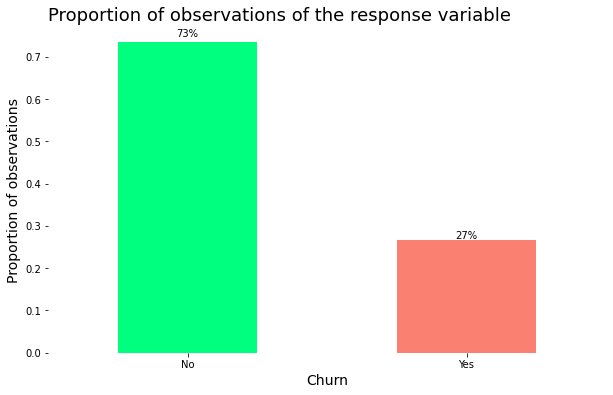

In [107]:
# create a figure
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = df_telco['Churn'].value_counts(normalize=True)

# create a bar plot showing the % of churn
prop_response.plot(kind='bar',
                   ax=ax,
                   color=['springgreen', 'salmon'])

# add the annotations
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center')

# set title and labels
ax.set_title('Proportion of observations of the response variable',
            fontsize=18, loc='left')
ax.set_xlabel('Churn',
             fontsize=14)
ax.set_ylabel('Proportion of observations',
             fontsize=14)
ax.tick_params(rotation='auto')


# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

<h4>Demographic Information</h4>
<p>Below we create a stacked percentage bar chart for each demogrpahic attribute - gender, SeniorCitizen, Partner, Dependents, showing the percentage of Churn for each category of the attribute.</p>

In [100]:
def percentage_stacked_plot(columns_to_plot, super_title):
    '''
    Prints 100% stacked plot of the response variable
    for independent variable of the list columns_to_plot.
    
    Params :
        columns_to_plot(list of string) : Names of the variables to plot
        super_title(string) : Super title of the visualization
        
    Returns :
        None
    '''
    num_of_columns = 2
    num_of_rows = math.ceil(len(columns_to_plot)/2)
    
    # create a fig
    fig = plt.figure(figsize=(12, 5 * num_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
    
    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        # createthe subplot
        ax = fig.add_subplot(num_of_rows, num_of_columns, index)
        
        # cal the % of observations of hte response variable for
        # each group of the independent variable
        prop_by_independent = pd.crosstab(df_telco[column],
                                         df_telco['Churn']).apply(lambda x: x/x.sum()*100, axis=1)
        
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                rot=0, color=['springgreen', 'salmon'])
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                 title='Churn', fancybox=True)
        
        # set title and labels
        ax.set_title('Proportion of observations by ' + column, 
                    fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
       
        #eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
    

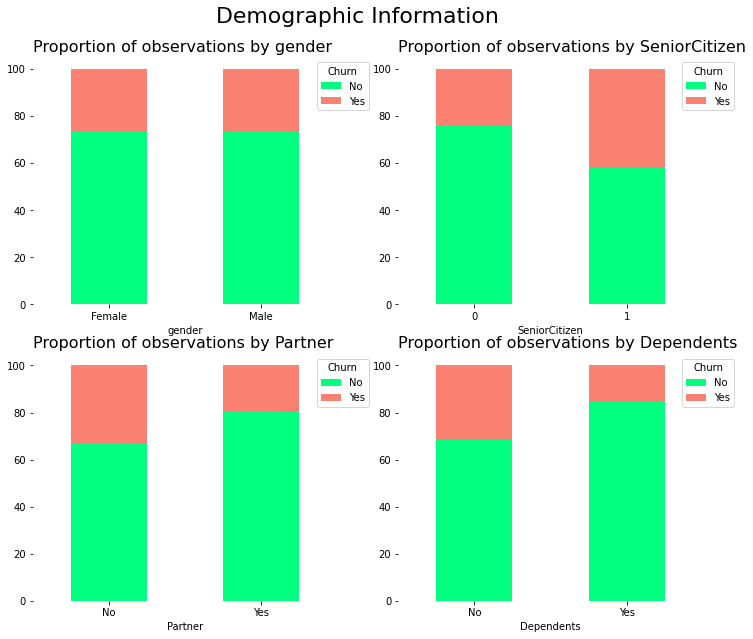

In [101]:
# Demographic Column Names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

<p>As shown above, each bar category of the independent variable, and it is subdivided to show the proportion of each response class (No and Yes).</p>
<p>We can extract <b>following conclusions</b> by analyzing <b>demogrpahic attributes</b>:
    <li>The churn rate of <b>senior citizens</b> is almost double that of <b>young citizens</b></li>
    <li>We do not expect <b>gender</b> to have significant predictive power. A similar percentage of churn is shown in both.</li>
    <li>Customers with a <b>partner</b> churn less than customers with no partners</li></p>

<h4>Customer Account Information - Categorical Variables</h4>
<p>As we did demographic attributes, we evaluate the percentage of Churn for each category of the customer account attributes(Contract, PaperlessBilling, PaymentMethod)</p>

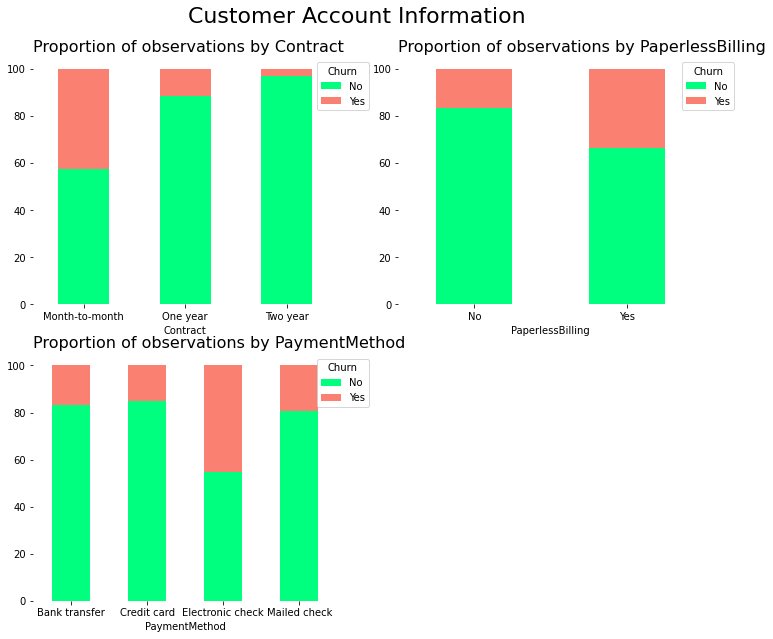

In [15]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

<p> We can extract the <b>following conclusions</b> by analyzing <b>customer account attribtues</b>:
    <li>Customers with <b>month-to-month contracts</b> have <b>higher churn rates</b> compared to clients with <b>yearly contacts.</b></li>
    <li>Customers who opted for an <b>electronic check</b> as paying method are more likely to leave the company.</li>
    <li>Customers subscriebd to <b>paperless billing</b> churn more than who are not subscribed</li></p

<h4>Customer Account Information - Numerical Variables</h4>
<p>The following plots show the distribution of tenure, MonthlyCharges, TotalCharges by Churn. For all numeric attributes, the distributions of both classes(No and Yes) are different which suggests that all of the attributes will be useful to determine whether or not a customer churns.</p>

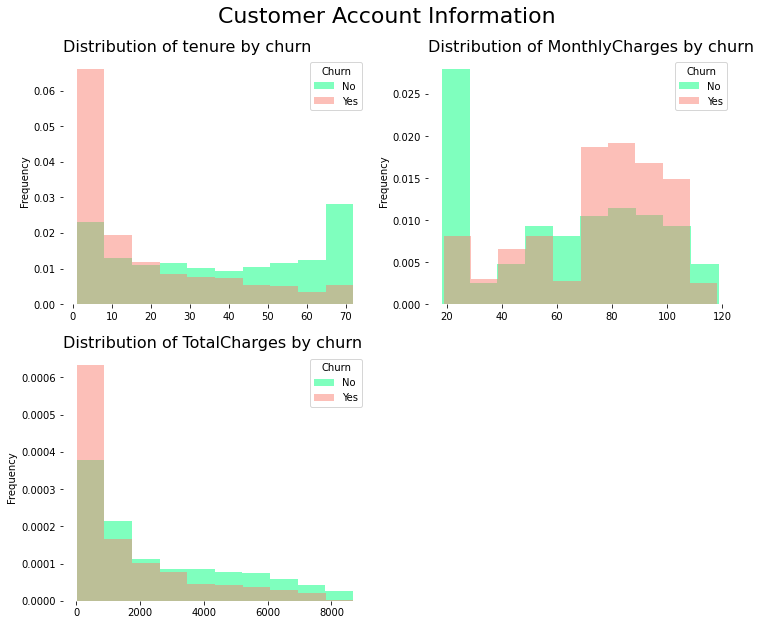

In [16]:
def histogram_plots(columns_to_plot, super_title):
    '''
    Prints a histogram for each independent variable of the list 
    columns_to_plot.
    
        Parameters:
            columns_to_plot(list of string): Names of the variables to plot
            super_title(string): Super title of the visualization
        
        Returns:
            None
    '''
    # set the num of rows and columns
    num_of_cols = 2
    num_of_rows = math.ceil(len(columns_to_plot)/2)
    
    # create a figure 
    fig = plt.figure(figsize=(12, 5 * num_of_rows)) 
    fig.suptitle(super_title, fontsize=22, y=.95)
    
    # loop to each customer account column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):
        
        # create the subplot
        ax = fig.add_subplot(num_of_rows, num_of_cols, index)
        
        # histograms for each class(normalized histograms)
        df_telco[df_telco['Churn']=='No'][column].plot(kind='hist',
                                                      ax=ax,
                                                      density=True,
                                                      alpha=0.5,
                                                      color='springgreen',
                                                      label='No')
        df_telco[df_telco['Churn']=='Yes'][column].plot(kind='hist',
                                                       ax=ax,
                                                       density=True,
                                                       alpha=0.5, 
                                                       color='salmon',
                                                       label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                 title="Churn", fancybox=True)
        
        # set the title and labels
        ax.set_title('Distribution of ' + column + ' by churn', 
                    fontsize=16, loc='left')
        
        ax.tick_params(rotation='auto')
        
        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of customer account columns
histogram_plots(account_columns_numeric, 'Customer Account Information')

<p>We can extract the <b>following conclusions</b> by analyzing the <b>histograms above</b>:
    <li>The churn rate tends to be larger when <b>monthly charges</b> are high.</li>
    <li>New customers (low <b>tenure</b>) are more likely to churn.</li>
    <li>Clients with high <b>total charges</b> are less likely to leave the company.</li></p>

<h4>Services Information</h4>
<p>We will evaluate the percentage of the target for each category of the service columns with stacked bar plots.</p>

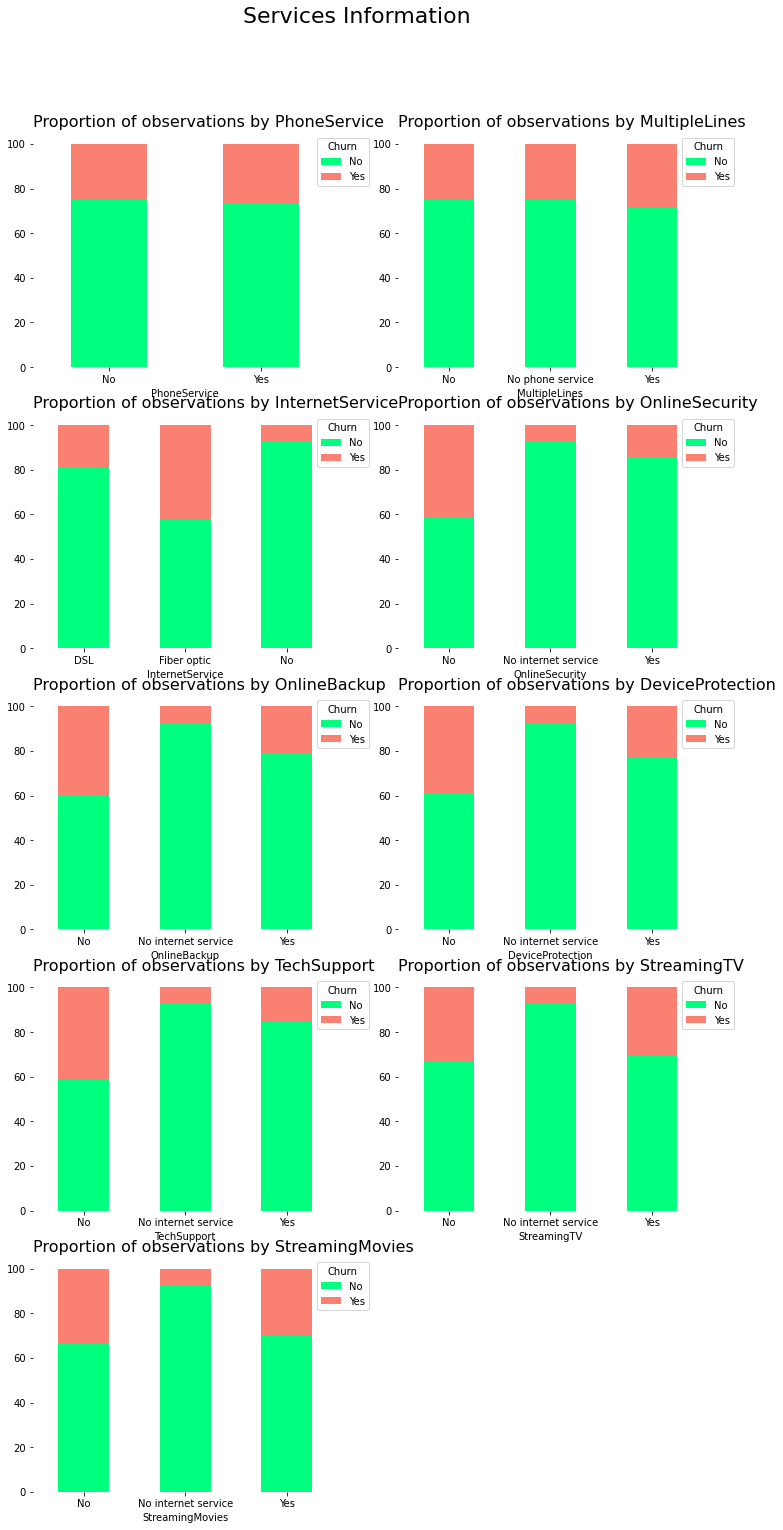

In [17]:
# service column names
services_columns = ['PhoneService', 'MultipleLines', 
                    'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 
                    'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 
                        'Services Information')

<p>We can extract the <b>following conclusions</b> by evaluating <b>services attributes</b>:
    <li>We do not expect <b>phone attributes</b>(PhoneService and MultipleLines) to have significant predictive power. The percentage of churn for all classes in both independent variables is nearly the same.</li>
    <li>Clients with <b>online security</b> churn less than those without it.</li>
    <li>Customers with no <b>tech support</b> tend to churn more often than those with tech support.</li></p>
<p>By looking at the plots above, we can identify the <b>most relevant attributes for detecting churn</b>.</p>

<h3>Feature Importance</h3>
<h4>Mutual Information - analysis of linear and nonlinear relationships</h4>
<p>It measures the mutual dependency between two variables based on entropy estimations. In ML, we're interested in <b>evaluating the degree of dependency between each independent variable and the response variable</b>.</p>
<p>Note : Higher values of mutual information show a high degree of dependency which indicates that the independent variable will be useful for predicting the target.</p>
<p>The Scikit-Learn library has implemented mutual information in the metrics package. The code below computes the mutual information score between each categorical variable of the data set and the Churn variable.</p>

In [83]:
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df_telco.Churn)

# select categorical variables excluding the response variable
categorical_variables = df_telco.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual info score btw each categorical variable
# and the target 
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


<p><b>Mutual Information</b> allows us not only to better understand our data but also to <b>identify the predictor variables that are completely independent of the target</b>.</p>
<p>As shown above, gender, PhoneService, and MultipleLines have a mutual information score really <b>close to 0</b>, meaning those variables do not have a strong relationship with the target.</p>

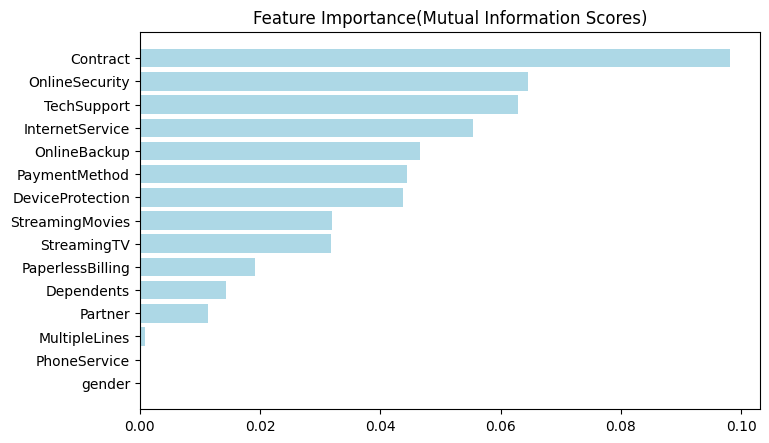

In [91]:
# function to visualize the mutual information score
def plot_mutual_information_score(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores, color="lightblue")
    plt.yticks(width, ticks)
    plt.title("Feature Importance(Mutual Information Scores)")
    
# plot barchart for mutual information score 
plt.figure(dpi=100, figsize=(8,5))
plot_mutual_information_score(feature_importance)

<p>The <b>mutual information</b> extends the notion of correlation to nonlinear relationships since, unlike Pearson's correlation coefficient, this method <b>is able to detect not only linear relationships but also nonlinear ones</b>.</p>

<h3>Feature Engineering</h3>
<p>The process of <b>extracting features from the data and transforming them into a format that is suitable for the machine learning model.</b></p>
<p>In this project, we need to transform both numerical and categorical variable since most of the ML algorithms require numerical values. 
    <li><b>All categorical attributes available in the dataset should be encoded into numerical labels</b> before training the model.</li> <li><b>We need to transform numeric columns into a common scale</b>.</li>

<h4>Label Encoding</h4>
<p>It is used to replace categorical values with numerical values. This encoding <b>replaces every category with a numerical label</b>. In this project, we use label encoding with the following binary variables : <li>gender,</li> <li>Partner,</li> <li>Dependents,</li> <li>PaperlessBilling,</li> <li>PhoneService,</li> <li>Churn</li></p>

In [18]:
df_telco_transformed = df_telco.copy()

# Label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents',
                         'PaperlessBilling', 'PhoneService',
                         'Churn']

# Encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_telco_transformed[column] = df_telco_transformed[column].map({'Female':1, 'Male':0})
    else:
        df_telco_transformed[column] = df_telco_transformed[column].map({'Yes':1, 'No':0})

<h4>One-Hot Encoding</h4>
<p>It creates a <b>new binary column for each level of the categorical variable</b>.</p>
<p>The new column contains zeros and ones indicating the absence or presence of the category in the data. For this project, we apply one-hot encoding to the following categorical variables :
    <li>Contract</li>
    <li>PaymentMethod</li>
    <li>MultipleLines</li>
    <li>InternetServices</li>
    <li>OnlineSecurity</li>
    <li>OnlineBackup</li>
    <li>DeviceProtection</li>
    <li>TechSupport</li>
    <li>StreamingTV</li>
    <li>StreamingMovies</li>

In [19]:
# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService',
                           'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport',
                           'StreamingTV', 'StreamingMovies',
                           'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
df_telco_transformed = pd.get_dummies(df_telco_transformed, columns = one_hot_encoding_columns)

<p>Note : The main drawback of this encoding is the significant increase in the dimensionality of the dataset(<b>curse of dimensionality</b>); therefore, this method should be avoided when the categorical column has a large number of unique values.</p>

<h4>Normalization</h4>
<p>It is a common practice in ML which consists of transforming <b>numeric columns</b> to a <b>common scale</b>.
It transforms multiscaled data to same scale. After normalization, all variables have a <b>similar influence</b> on the model, improving the stability and performance of hte learning algorithm.</p>
<p>For this project, we will use the min-max method to rescale the numeric columns(tenure, MonthlyCharges, TotalCharges) to a common scale. The <b>min-max approach</b> (often called <b>normalization</b>) rescales the feature to a fixed range of[0,1] by subtracting the minimum value of the feature and then dividing by the range.</p>
<p>The features with higher values will dominate the learning process; however it does not mean those variables are more important to predict the target.</p>

In [20]:
# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variabels using min max scaler
for column in min_max_columns:
    # minimum value of the column
    min_column = df_telco_transformed[column].min()
    # maximum value of the column
    max_column = df_telco_transformed[column].max()
    # min max scaler
    df_telco_transformed[column] = (df_telco_transformed[column] - min_column)

<h3>Splitting the data in training and testing sets</h3>
<p>The training set is used by the machine learning algorithm to build the model.</p>
<p>The test set contains samples that are not part of the learning process and is used to evaluate the model's performance. It is important to assess the quality of the model using unseen data to gurantee an objective evaluation.</p>

In [21]:
# select independent variables
X = df_telco_transformed.drop(columns='Churn')

# select dependent variables
y = df_telco_transformed.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

In [36]:
# Split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25,
                                                    random_state=40, 
                                                    shuffle=True)

<h3>Assessing Multiple Algorithms</h3>
<p><b>Algorithm selection is a key challenge in any ML project</b> since there is not an algorithm that is the best across all projects.</p>
<p>Generally, we need to evaluate a set of potential candidates and select for further evaluation those that provide better performance.</p>
<p>For this project, we compare <b>5 different algorithms</b>:
    <li>K Nearest Neighbors</li>
    <li>Logistic Regression</li>
    <li>Support Vector Machines</li>
    <li>Random Forest</li>
    <li>Gradient Boosting</li></p>

In [68]:
def create_models(seed=2):
    '''
        Create a list of ML models
            Parameters : 
                seed (integer) : random seed of the models
            Returns :
                models (list) : list containing the models
    '''
    
    models = []
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(max_iter=1000, random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [69]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: k_nearest_neighbors, Accuracy: 0.7571103526734926)
Classifier: logistic_regression, Accuracy: 0.7969283276450512)
Classifier: support_vector_machines, Accuracy: 0.745164960182025)
Classifier: random_forest, Accuracy: 0.7713310580204779)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


<p>Note : We've trained all the algorithms using the default hyperparameters. The accuracy of ML algorithms is highly sensistive to the hyperparameters chosen for training the model. A more in-depth analysis will include an evaluation of a wider range of hyperparameters before choosing a model(or models) for hyperparameter tuning. For this project, we ill only further evaluate the model that presents higher accuracy using the default hyperparameters. As shown above, this corresponds to the <b>gradient boosting model</b> which shows an accuracy of nearly 80%.</p>

<h3>Gradient Boosting</h3>
<p>It is a very popular ML <b>ensemble method</b> based on <b>sequential training</b> of multiple models to make predictions. You make a model using a randome sample of your original data, after fitting the model, you make predictions and compute the residuals of your model. <b>The residuals are the difference betweeb the actual values and the predictions of the model</b>. Then, you train a new tree based on the residuals of the previous tree, calculating again the residuals of this new model. We repeat this process until we reach a threshold(residual close to 0), meaning there is a very low difference between the actual and predicted values. Finally, <b>you take a sum of all model forecasts</b>(prediction of the data and predictions of the error) to make a final prediction.</p>

<p> We can easily build <b>gradident boosting classifier</b> with Scikit-Learn using the GradientBoostingClassifier class from the sklearn.ensemble module. After <b>creating the model</b>, we need to <b>train it</b>(using the .fit method) and <b>tests its performance</b> by comparing the predictions(.predict method) witht he actual values, as you can see in the above code.</p>

<p>As shown in the <b>Scikit-Learn documentation</b> the GradientBoostingClassifier has <b>multiple hyperparameters</b>; some of them are listed below:
    <li>learning_rate : the contribution of each tree to the final prediction.</li>
    <li>n_estimators : the num of decision trees to perform(boosting stages)</li>
    <li>max_depth : the max depth of the individual regression estimators.</li>
    <li>max_features : the num of features to consider when looking for the best split.</li>
    <li>min_samples_split : the minimum num of samples required to split an internal node.</li>

<h3>Hyperparameter Tuning</h3>
<p>The <b>selection of hyperparameters</b> consists of testing the performance of the model against different combinations of hyperparameters, selecting those that perform best according to a <b>chosen metric</b> and a <b>validation method</b>.</p>

<p>For hyperparameter tuning, <b>we need to split our training data again into a set for training and a set for testing</b> the hyperparameters(often called validation set). It is a very common practice to use <b>k-fold cross-validation for hyperparameter tuning</b>. The training set is divided again into <b>k equal-sized</b> samples, 1 sample is used for testing and the remaining k-1 samples are used for training the model, repeating the process k times. Then, the k evaluation metrics are averaged to produce a single estimator.</p>

<p>It is important to stress that <b>the validation set is used for hyperparameter selection and not for evaluating the final performance of our model</b>.</p>

<p>There are multiple techniques to find the best hyperparameters for a model. The most popular methods are - <b>grid search, random search, bayesian optimization</b>. Grid search test all combinations of hyperparameters and select the best performing one, it can be really time-consuming method, particularly when the num of hyperparameters and values to try are really high.</p>

<p>In <b>random search</b>, you specify a grid of hyperparameters, and <b>random combinations are selected</b> where each combination of hyperparameters has an equal chance of being sampled.This approach is much more computationally efficient than trying all combinations; however, it also has some disadvantages. The main drawback of <b>random search</b> is that <b>not all areas of the grid are evenly covered</b>, especially when the number of combinations selected from the grid is low.</p>

<p>We can implement <b>random search</b> in Scikit-Learn using the RandomSeachCV class from the sklearn.model_selection package. First of all, we specify <b>the grid of hyperparameter values</b> using a dictionary(grid_parameters) where the <b>keys</b> represent the <b>hyperparameters</b> and the <b>values</b> are the <b>set of options</b> we want to evaluate. Then, we define the RandomizedSearchCV object for trying different random combinations from this grid. The num of hyperparameter combinations that are sampled is defined in the n_iter parameter. Naturally, increasing n_iter will lead in most cases to more accurate results, since more combinations are sampled; however, on many occasions, the improvement in performance won't be significant.</p>

In [73]:
# define the paraneter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}

# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)

{'n_estimators': 110, 'min_samples_split': 5, 'max_features': 'log2', 'max_depth': 3}


<h3>Performance of the model</h3>
<p>The last step of <b>the ML process</b> is to check the <b>performance of the model</b>(best hyperparameters) by using the confusion matrix and some evaluation metrics.</p>

<h4>Confusion Metrics</h4>
<p>It is also known as the error matrix, is used to <b>evaluate the performance of a ML model</b> by examining the number of observations that are correctly and incorrectly classified.</p>
<p><b>Each column of the matrix contains the predicted classes while each row represents the actual classes or vice versa.</b></p>
<p>In a perfect classification, the confusion matrix will be all zeros except for the diagonal. <b>All the elements out of the main diagonal represent misclassifications.</b> It is important to bear in mind the confusion matrix allows us to observe patterns of misclassification(which classes and to which extend they were incorrectly classified).
<p>In <b>binary classification problems</b>, the <b>confusion matrix</b> is a <b>2-by-2 matrix</b> composed of 4 elements:
    <li><b>TP(True Positive)</b> : number of patients with spine problems that are correctly classified as sick.</li>
    <li><b>TN(True Negative)</b> : number of patients without pathologies who are correctly classified as healthy.</li>
    <li><b>FP(False Positive)</b> : number of healthy patients that are worngly classified as sick.</li>
    <li><b>FN(False Negative)</b> : number of patients with spine diseases that are misclassified as healthy.</li>
    
<p><b>Now that the model is trained, it is time to evaluate its performance using the testing set.</b></p>

<p>First we use the previous model(gradient boosting classifier with best hyperparameters) to predict the class labels of the testing data(with the predict method). Then, we construct the confusion matrix using the confusion_matrix function from the sklearn.metrics package to check which observations were properly classified. The output is a NUmpy array where <b>the rows represent the true values</b> and <b>the columns the predicted classes</b>.</p>

In [77]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1154,  156],
       [ 192,  256]])

<p>Note : As shown above, 1410 observations of the testing data were correctly classified by the model(1154 true negatives and 256 true positives). On the contrary, we can observe 356 misclassifications (156 false positives and 192 false negatives).</p>

<h3>Evaluation Metrics</h3>
<p>Evaluating the quality of the model is a fundamental part of ML process. The most used <b>performance evaluation metrics</b> are calculated based on the elements of the confusion matrix.
    <li>Accuracy : It represents the proportion of predictions that were correctly classified. Accuracy is the most commonly used evaluation metric; however, it is important to bear in mind that accuracy can be misleading when working with imbalanced datasets.</li>
    <li>Sensitivity : It represents the proportion of positive samples (diseased patients) that are identified as such.</li>
    <li>Specificity : It represents the proportion of negative samples (healthy patients) that are identified as such.</li>
    <li>Precision : It represents the proportion of positive predictions that are actually correct.</li>
We can calculate the evaluation metrics manually using the numbers of the confusion matrix. Alternatively, Scikit-learn has already implemented the function classification_report that provides a <b>a summary of the key evaluation metrics</b>. The classification report contains the precision, sensitivity, f1-score, and support(num of samples) achieved for each class.

In [80]:
# print classification report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1310
           1       0.62      0.57      0.60       448

    accuracy                           0.80      1758
   macro avg       0.74      0.73      0.73      1758
weighted avg       0.80      0.80      0.80      1758



<p>As shown above, we obtain a <b>sensitivity</b> of 0.57(192/(192+256)) and a specificity of 0.88(1154/(1154+156)). The model obtained predicts more accurately customers that do not churn. This should not surprise us at all, since <b>gradient boosting classifiers are usually biased toward the classes with more observations.</b>

In [81]:
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

0.8020477815699659

<h3>Drawing Conclusions</h3>
<p>We have walked through a complete end-to-end machine learning project using the <b>Telco customer Churn</b> dataset. We started by cleaning the data and analyzing it with visualization. Then, to be able to build a machine learning model, we transformed the categorical data into numeric variables (feature engineering). After transforming the data, we tried 6 different machine learning algorithms using default parameters. Finally, we tuned the hyperparameters of the <b>Gradient Boosting Classifier</b> (best performance model) for model optimization, obtaining an <b>accuracy of nearly 80%</b>. 